# 0.) Import and Clean data

In [1]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from sklearn.preprocessing import StandardScaler

import seaborn as sns
from sklearn.decomposition import PCA

In [3]:
drive.mount('/content/gdrive/', force_remount = True)

Mounted at /content/gdrive/


In [4]:
df = pd.read_csv("/content/gdrive/MyDrive/Country-data.csv", sep = ",")

In [5]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [6]:
df.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [7]:
names = df[["country"]]
X = df.drop(["country"], axis = 1)

In [8]:
scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)

# 1.) Run a PCA Algorithm to get 2 Principle Components for the 9 X features

In [9]:
pca = PCA(n_components = 2)
X_pca = pca.fit_transform(X_scaled)

# 2.) Plot a Scatter plot of the PCs on the axis

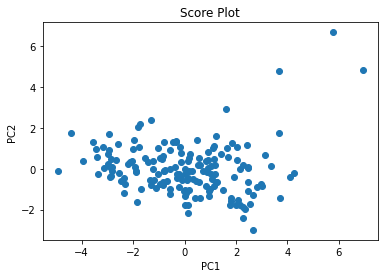

In [10]:
plt.scatter(x = X_pca[:, 0], y = X_pca[:, 1])
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Score Plot")
plt.show()

# 3.) Rank the features in order of importance according to PCA

In [11]:
loadings = pca.components_

In [12]:
feature_importance = pd.DataFrame(np.sum(loadings**2, axis = 0))

In [13]:
feature_names = df.columns[1:]

In [14]:
feature_importance.index = feature_names

In [15]:
feature_importance.sort_values(0, ascending = False)

,0
imports,0.477420
exports,0.456567
life_expec,0.230937
child_mort,0.213201
total_fer,0.187094
income,0.159263
gdpp,0.156288
health,0.081843
inflation,0.037386


# 4.) Plot a heatmap of the feature importance (Fill in all parameters)

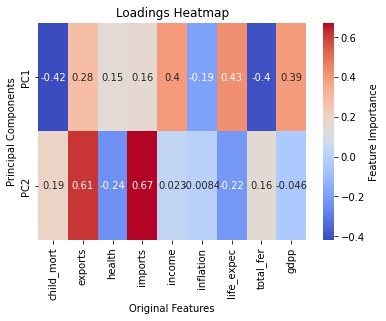

In [16]:
sns.heatmap(loadings, annot = True, cmap = 'coolwarm', xticklabels = feature_names, yticklabels = ["PC1", "PC2"], cbar_kws={'label':'Feature Importance'})

plt.xlabel('Original Features')
plt.ylabel('Principal Components')
plt.title('Loadings Heatmap')
plt.show()

# 5.) Plot a correlation plot of the original features. What do you notice between the graphs of 4 & 5?

[]

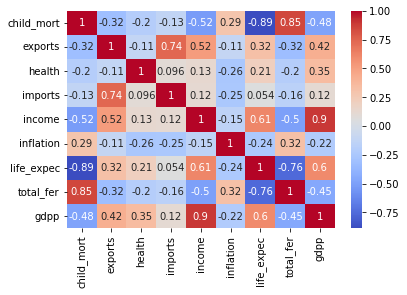

In [17]:
sns.heatmap(X.corr(), cmap = 'coolwarm', annot = True)
plt.plot()

The variables with high correlation has similar components. For instance, *Child Mortility* and *Total Fertility* has the same performance in the first heatmap.


# 6.) Run a PCA with 9 PCs. Plot a Cumulative Explained Variance Plot. How many PCs should we use if we want to retain 95% of the variance?

In [18]:
pca = PCA(n_components = 9)
X_pca = pca.fit_transform(X_scaled)

In [19]:
pca.explained_variance_ratio_

array([0.4595174 , 0.17181626, 0.13004259, 0.11053162, 0.07340211,
       0.02484235, 0.0126043 , 0.00981282, 0.00743056])

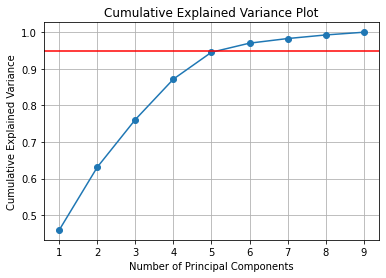

In [20]:
cumulative_explained_variance = pca.explained_variance_ratio_.cumsum()

plt.plot(np.arange(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o')
plt.axhline(y = 0.95, color = 'red')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance Plot')
plt.grid()
plt.show()

Since the threshold is 95%, we should use PCs = 6.